Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.44663 154.14; 8.17762 155.18; … ; 7.44251 154.518; 7.58038 154.763]

Union{Missing, Float64}[7.64474 154.312; 7.73288 154.883; … ; 7.78782 154.613; 8.07656 154.457]

Union{Missing, Float64}[7.39031 154.978; 7.55055 154.98; … ; 7.32308 155.447; 8.28391 154.515]

Union{Missing, Float64}[7.61427 154.641; 7.7666 154.488; … ; 7.21947 154.721; 7.3668 154.319]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7587156 0.29214740 0.0046192559 0.0055557426 1000
   mu 154.5957478 0.40054114 0.0063331115 0.0070740234 1000

Quantiles:
          2.5%      25.0%      50.0%      75.0%      97.5%  
sigma   7.2300262   7.55012   7.749485   7.9560625   8.35704
   mu 153.7989750 154.32675 154.596000 154.8600000 155.38605



Plot the density of posterior draws

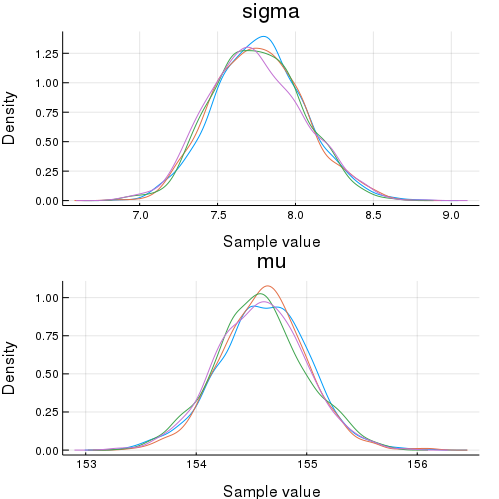

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.16578597832932934
 0.08209518690975363

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
 1.0        0.0846243
 0.0846243  1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*